 ### Семинар 6
 # Случайный лес

**Случайный лес** (Random forest) — это модель машинного обучения, объединяющая некоторое количество решающих деревьев в одну композицию (ансамбль), за счет чего улучшается их качество работы и обобщающая способность. Деревья строятся независимо друг от друга. Чтобы они отличались друг от друга, обучение проводится бутстрэпированном подмножестве.

Метод бутстрэпа заключается в следующем. Пусть имеется выборка $\large X$ размера $\large N$. Равномерно возьмем из выборки $\large N$ объектов с возвращением. 

Также, для дальнейшего уменьшения схожести деревьев, оптимальный признак для разбиения выбирается не из всех возможных признаков, а лишь из их случайного подмножества. Прогнозы, выданные деревьями, объединяются в один ответ путем усреднения в случае регрессии и мажоритарным голосованием в случае классификации.

Особенность случайного леса заключается в том, что он не переобучается по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья не зависят друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь понижает уровень шума в прогнозах.

Случайные леса для задач классификации и регрессии в библиотеке `Scikit-learn` представлены классами `RandomForestClassifier` и `RandomForestRegressor`. Основными гиперпараметрами моделей являются:

`n_estimators` - число деревьев в ансамбле

`criterion` - критерий для разбиения выборки в вершине

`max_features` - число признаков для построения одного дерева

`min_samples_leaf` - минимальное число объектов в листе (рекомендуется устанавливать равным 1 для классификации и равным 5 для регрессии)

`max_depth` - максимальная глубина дерева


Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

 ### 1. Загрузите встроенный датасет load_breast_cancer. Обозначьте признаки за X, а целевую переменную за y и выведите их размеры. Выведите данные в виде датафрейма.

In [5]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [6]:
X.shape, y.shape

((569, 30), (569,))

In [7]:
data = pd.DataFrame(X, columns=cancer.feature_names)
data['target'] = y
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


 ### 2. Разделите данные на обучающую и тестовую части в соотношении 4:1, зафиксировав random_state=42. Выведите получившиеся размеры обучающей и тестовой выборок. 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((455, 30), (114, 30))

 ### 3. Обучите на обучающих данных модель классификационного решающего дерева с параметрами по умолчанию, зафиксировав только random_state=42. Выведите знасение метрики accuracy на тестовых данных.

In [9]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
tree_clf.score(X_test, y_test)

0.9473684210526315

 ### 4. Обучите на обучающих данных модель классификационного случайного леса из 30 деревьев, зафиксировав random_state=42. Выведите знасение метрики accuracy на тестовых данных. Сделайте вывод о том, какая модель лучше осуществляет классификацию для этих данных: решающее дерево или случайный лес из 30 деревьев. Выведите список базовых алгоритмов деревьев, участвующих в модели леса при помощи атрибута .estimators_.

In [11]:
forest_clf = RandomForestClassifier(n_estimators=30, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [12]:
forest_clf.score(X_test, y_test)

0.9649122807017544

In [14]:
forest_clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

 ### 5. Исследуйте на переобученность построенные модели дерева решений и случайного леса с 30 деревьями. Для этого осуществите кросс-валидацию с 10 итерациями.

In [19]:
cv_results = cross_validate(tree_clf,
                            X_train, y_train,
                            cv=10,
                            scoring='accuracy',
                            return_train_score=True)
scores = pd.DataFrame(cv_results)[['train_score', 'test_score']]
scores

,train_score,test_score
0,1.0,0.913043
1,1.0,0.934783
2,1.0,0.978261
3,1.0,0.847826
4,1.0,0.934783
5,1.0,0.977778
6,1.0,0.911111
7,1.0,0.955556
8,1.0,0.977778
9,1.0,0.866667


In [21]:
scores.mean(axis=0)

train_score    1.000000
test_score     0.929758
dtype: float64

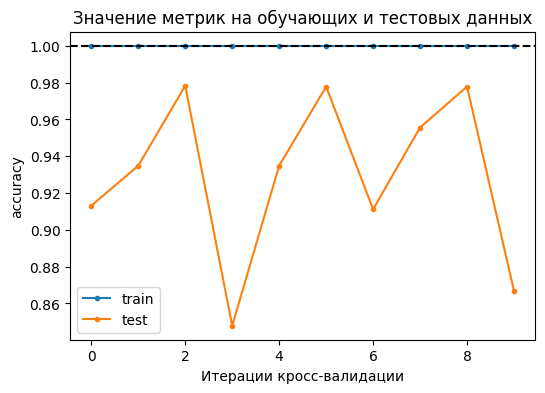

In [25]:
plt.figure(figsize=(6, 4))

plt.plot(scores.iloc[:, 0], label='train', marker='.')
plt.plot(scores.iloc[:, 1], label='test',  marker='.')
plt.axhline(y=1, color='black', ls='dashed')

plt.title('Перекрестная проверка для дерева решений ')
plt.xlabel('Итерации кросс-валидации')
plt.ylabel('accuracy')

plt.legend()
plt.show()

In [27]:
cv_results = cross_validate(forest_clf,
                            X_train, y_train,
                            cv=10,
                            scoring='accuracy',
                            return_train_score=True)
scores_rf = pd.DataFrame(cv_results)[['train_score', 'test_score']]
scores_rf

,train_score,test_score
0,0.997555,1.000000
1,0.997555,0.978261
2,0.997555,1.000000
3,1.000000,0.934783
4,0.997555,0.978261
5,0.995122,0.977778
6,0.995122,0.955556
7,0.995122,0.933333
8,0.997561,0.977778
9,1.000000,0.933333


In [29]:
scores_rf.mean(axis=0)

train_score    0.997315
test_score     0.966908
dtype: float64

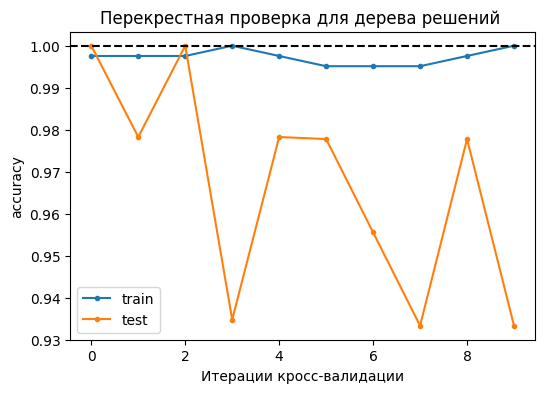

In [28]:
plt.figure(figsize=(6, 4))

plt.plot(scores_rf.iloc[:, 0], label='train', marker='.')
plt.plot(scores_rf.iloc[:, 1], label='test',  marker='.')
plt.axhline(y=1, color='black', ls='dashed')

plt.title('Перекрестная проверка для дерева решений ')
plt.xlabel('Итерации кросс-валидации')
plt.ylabel('accuracy')

plt.legend()
plt.show()

 ### 6. Посмотрите на поведение модели случайного леса при росте числа деревьев. Для этого постройте кривую проверки в зависимости от числа деревьев от 1 до 100. При этом количество итераций кросс-валидации возьмите равным трём.

In [30]:
estimators = np.arange(1, 101)

In [31]:
train_scores, test_scores = validation_curve(RandomForestClassifier(random_state=42), 
                                            X_train, y_train, param_name='n_estimators',
                                            param_range=estimators, cv=3,scoring='accuracy',
                                            n_jobs=-1,
                                            )

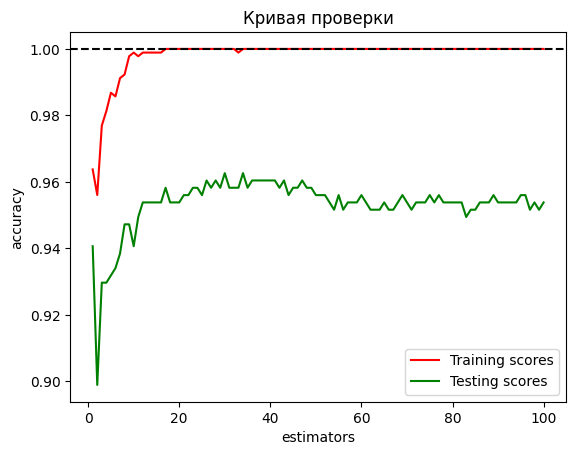

In [33]:
plt.plot(estimators, train_scores.mean(axis=1), label='Training scores', color='r')
plt.plot(estimators, test_scores.mean(axis=1), label='Testing scores', color='g')

plt.axhline(y=1, color='black', ls='dashed')

plt.title('Кривая проверки')
plt.ylabel('accuracy')
plt.xlabel('estimators')
plt.legend()

 ### 7. Определите степени важности признаков, используя атрибут .feature_importances_. Выберите два наиболее важных признака. 

In [34]:
forest_clf.feature_importances_

array([0.06339443, 0.01782578, 0.04488739, 0.0471399 , 0.00596547,
       0.02368214, 0.08825431, 0.14034634, 0.00417946, 0.00460026,
       0.0387992 , 0.00480886, 0.00841159, 0.05123942, 0.00352245,
       0.0035935 , 0.00897903, 0.00597533, 0.00460855, 0.00611368,
       0.04932543, 0.01834412, 0.05172104, 0.10617421, 0.0080019 ,
       0.02568527, 0.01566631, 0.13561429, 0.00625461, 0.00688574])

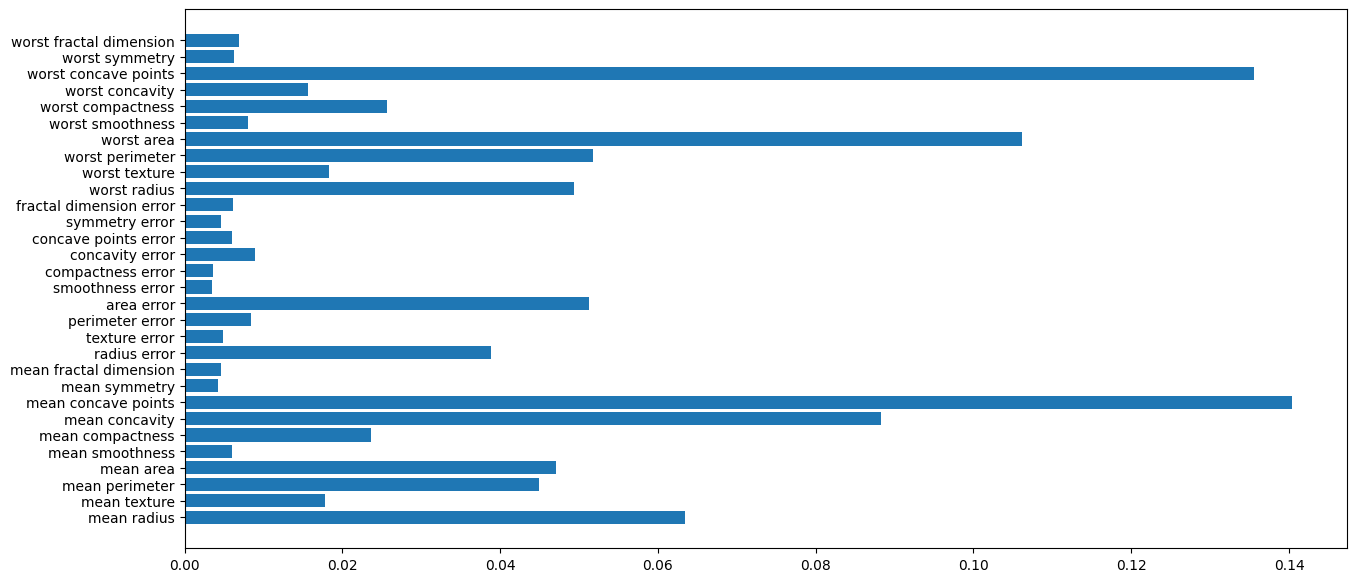

In [37]:
plt.figure(figsize=(15, 7))

plt.barh(cancer.feature_names, forest_clf.feature_importances_)

plt.show()

In [40]:
forest_clf.feature_importances_.argsort()

array([14, 15,  8,  9, 18, 11,  4, 17, 19, 28, 29, 24, 12, 16, 26,  1, 21,
        5, 25, 10,  2,  3, 20, 13, 22,  0,  6, 23, 27,  7])

In [41]:
np.sort(forest_clf.feature_importances_)

array([0.00352245, 0.0035935 , 0.00417946, 0.00460026, 0.00460855,
       0.00480886, 0.00596547, 0.00597533, 0.00611368, 0.00625461,
       0.00688574, 0.0080019 , 0.00841159, 0.00897903, 0.01566631,
       0.01782578, 0.01834412, 0.02368214, 0.02568527, 0.0387992 ,
       0.04488739, 0.0471399 , 0.04932543, 0.05123942, 0.05172104,
       0.06339443, 0.08825431, 0.10617421, 0.13561429, 0.14034634])

In [45]:
for i in forest_clf.feature_importances_.argsort()[::-1]:
    print(f"{cancer.feature_names[i]:<25} {forest_clf.feature_importances_[i]:.3f}")

mean concave points       0.140
worst concave points      0.136
worst area                0.106
mean concavity            0.088
mean radius               0.063
worst perimeter           0.052
area error                0.051
worst radius              0.049
mean area                 0.047
mean perimeter            0.045
radius error              0.039
worst compactness         0.026
mean compactness          0.024
worst texture             0.018
mean texture              0.018
worst concavity           0.016
concavity error           0.009
perimeter error           0.008
worst smoothness          0.008
worst fractal dimension   0.007
worst symmetry            0.006
fractal dimension error   0.006
concave points error      0.006
mean smoothness           0.006
texture error             0.005
symmetry error            0.005
mean fractal dimension    0.005
mean symmetry             0.004
compactness error         0.004
smoothness error          0.004


 ### 8. Используя только два наиболее важных признака, разбейте данные на обучающую и тестовую части. Обучите на обучающих данных модель классификационного случайного леса из 30 деревьев, зафиксировав random_state=42. Выведите знасение метрики accuracy на тестовых данных. Визуализируйте области разделения на классы для тестовых данных и диаграмму рассеивания тестовых данных на одном графике.

In [50]:
X_imp = data.iloc[:, [7, 27]]
X_imp.shape

(569, 2)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((455, 2), (114, 2))

In [63]:
tree_clf = RandomForestClassifier(random_state=42, n_estimators=30)
tree_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [64]:
tree_clf.score(X_test, y_test)

0.8859649122807017

 # Задания для самостоятельного выполнения:

 ### 1. Загрузите данные об уровне заработной платы multiple_linear_regression_dataset.csv. Обозначьте признаки за X, а целевую переменную income за y и выведите их размеры. Выведите данные в виде датафрейма.

 ### 2. Разделите данные на обучающую и тестовую части в соотношении 4:1, зафиксировав random_state=42. Выведите получившиеся размеры обучающей и тестовой выборок.

 ### 3. Обучите на обучающих данных модель регрессионного решающего дерева с параметрами по умолчанию, зафиксировав только random_state=42. Выведите значение метрики RMSE на тестовых данных.

 ### 4. Обучите на обучающих данных модель регрессионного случайного леса из 80 деревьев, зафиксировав random_state=42. Выведите значение метрики RMSE на тестовых данных. Сделайте вывод о том, какая модель лучше осуществляет регрессию для этих данных: решающее дерево или случайный лес из 80 деревьев. Выведите список базовых алгоритмов деревьев, участвующих в модели леса при помощи атрибута .estimators_.

 ### 5. Исследуйте на переобученность построенные модели дерева решений и случайного леса с 80 деревьями. Для этого осуществите кросс-валидацию с 5 итерациями.

 ### 6. Посмотрите на поведение модели случайного леса при росте числа деревьев. Для этого постройте кривую проверки в зависимости от числа деревьев от 1 до 100. При этом количество итераций кросс-валидации возьмите равным трём.

 ### 7. Определите степени важности признаков, используя атрибут .feature_importances_. Выберите самый важный признак. 

 ###  8. Используя только один наиболее важный признак, разбейте данные на обучающую и тестовую части. Обучите на обучающих данных модель регрессионного случайного леса из 80 деревьев, зафиксировав random_state=42. Выведите значение метрики RMSE на тестовых данных. Визуализируйте ломаную линию регрессии для тестовых данных и диаграмму рассеивания тестовых данных на одном графике.